In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Get the Data
#Set index_col=0 to use the first column as the index.

In [3]:
df = pd.read_csv("C:\\Users\\acer\\Downloads\\glass.csv",index_col=0)

In [4]:
df.head(10)

,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,,,,,,,,,
1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1


In [5]:
#Standardize the Variables
#Because the KNN classifier predicts the class of a given test observation by identifying 
#the observations that are nearest to it, the scale of the variables matters. 
#Any variables that are on a large scale will have a much larger effect on the distance between the observations, 
#and hence on the KNN classifier, than variables that are on a small scale.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('Type',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
scaled_features = scaler.transform(df.drop('Type',axis=1))

In [11]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


In [14]:
#Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Type'],
                                                    test_size=0.30)

In [17]:
#Using KNN
#Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not.
#We'll start with k=1.

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [21]:
pred = knn.predict(X_test)

In [22]:
#Predictions and Evaluations
#Let's evaluate our KNN model!

In [23]:
from sklearn.metrics import classification_report,confusion_matrixb

In [24]:
print(confusion_matrix(y_test,pred))

[[17  5  1  0  0  0]
 [ 9 13  2  2  0  0]
 [ 3  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  8]]


In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.59      0.74      0.65        23
           2       0.72      0.50      0.59        26
           3       0.00      0.00      0.00         3
           5       0.25      1.00      0.40         1
           6       1.00      1.00      1.00         3
           7       1.00      0.89      0.94         9

    accuracy                           0.65        65
   macro avg       0.59      0.69      0.60        65
weighted avg       0.68      0.65      0.65        65



In [26]:
#Choosing a K Value
#Let's go ahead and use the elbow method to pick a good K Value:

In [27]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

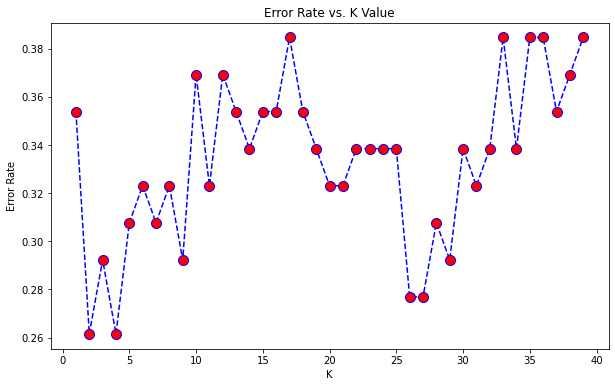

In [28]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [29]:
#Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05
#Let's retrain the model with that and check the classification report!

In [30]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[17  5  1  0  0  0]
 [ 9 13  2  2  0  0]
 [ 3  0  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  1  0  8]]


              precision    recall  f1-score   support

           1       0.59      0.74      0.65        23
           2       0.72      0.50      0.59        26
           3       0.00      0.00      0.00         3
           5       0.25      1.00      0.40         1
           6       1.00      1.00      1.00         3
           7       1.00      0.89      0.94         9

    accuracy                           0.65        65
   macro avg       0.59      0.69      0.60        65
weighted avg       0.68      0.65      0.65        65



In [31]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[21  2  0  0  0  0]
 [ 9 15  0  2  0  0]
 [ 3  0  0  0  0  0]
 [ 0  1  0  0  0  0]
 [ 2  0  0  0  0  1]
 [ 2  0  0  0  0  7]]


              precision    recall  f1-score   support

           1       0.57      0.91      0.70        23
           2       0.83      0.58      0.68        26
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.88      0.78      0.82         9

    accuracy                           0.66        65
   macro avg       0.38      0.38      0.37        65
weighted avg       0.66      0.66      0.63        65



c:\users\acer\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
